SAP-ID: 60009220209 NAME: HITARTH BHATT BATCH:D1-2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df = pd.read_csv('/content/database.csv')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


Loading the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

Providing information about the dataset

In [ ]:
df.isnull().sum()/len(df) * 100

Date                           0.000000
Time                           0.000000
Latitude                       0.000000
Longitude                      0.000000
Type                           0.000000
Depth                          0.000000
Depth Error                   80.945669
Depth Seismic Stations        69.686486
Magnitude                      0.000000
Magnitude Type                 0.012814
Magnitude Error               98.603280
Magnitude Seismic Stations    89.048351
Azimuthal Gap                 68.823680
Horizontal Distance           93.148813
Horizontal Error              95.062361
Root Mean Square              25.884162
ID                             0.000000
Source                         0.000000
Location Source                0.000000
Magnitude Source               0.000000
Status                         0.000000
dtype: float64

We calculate the percentage of null values in the dataset for each label

In [ ]:
df = df.drop(df.loc[:, df.isnull().mean() > 0.5].columns, axis = 1)

We drop columns that have more than 50% NULL values

In [ ]:
data = df[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


THis is the data which will be most useful for earthquake prediction

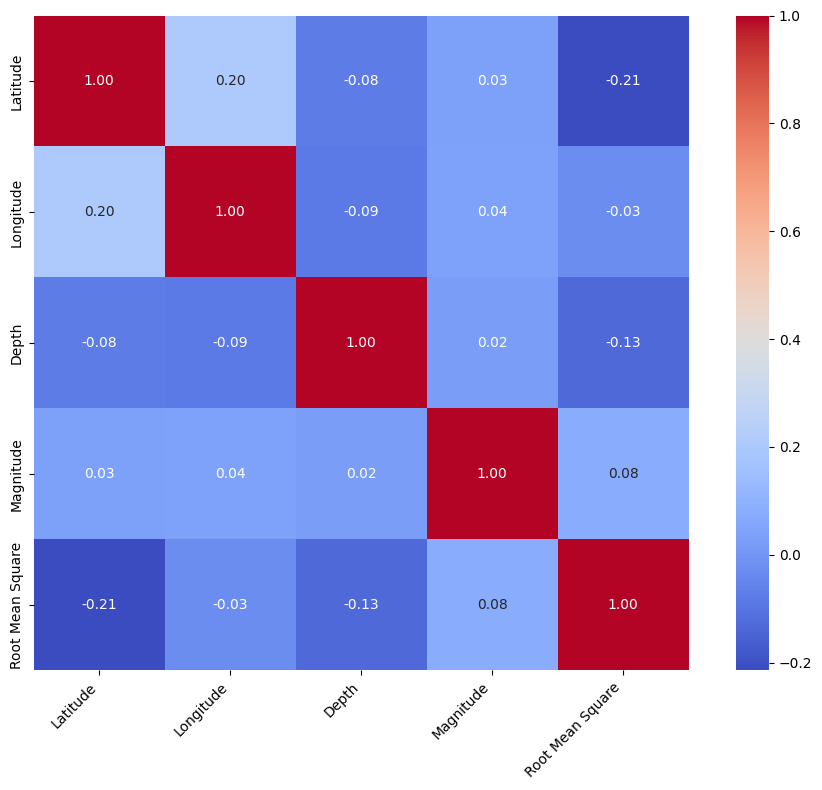

In [ ]:
df_no_date = df.drop('Date', axis=1)
df_numeric = df_no_date.select_dtypes(include=[np.number])
corr = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


From the heatmap it is clear that no labels are corellated

In [ ]:
df.describe()

,Latitude,Longitude,Depth,Magnitude,Root Mean Square
count,23412.000000,23412.000000,23412.000000,23412.000000,17352.000000
mean,1.679033,39.639961,70.767911,5.882531,1.022784
std,30.113183,125.511959,122.651898,0.423066,0.188545
min,-77.080000,-179.997000,-1.100000,5.500000,0.000000
25%,-18.653000,-76.349750,14.522500,5.600000,0.900000
50%,-3.568500,103.982000,33.000000,5.700000,1.000000
75%,26.190750,145.026250,54.000000,6.000000,1.130000
max,86.005000,179.998000,700.000000,9.100000,3.440000


Provides descriptive statistics for numeric columns in the dataset

In [ ]:
df.fillna({'Root Mean Square':df['Root Mean Square'].median()},inplace=True)
df = df.drop(df[df['Magnitude Type'].isnull()].index)

Root Mean square had null values which was less than 50% to replace the null values we use the above code and replace it by the median
Also Magnitude Type has null values as the data was in String data type we remove those data (in this case it had only 3 values so does not make a huge difference)

In [ ]:
df.isnull().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
Root Mean Square    0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

No null values present

In [ ]:
output = []
for col in df.columns:
    unique = df[col].nunique()
    colType = str(df[col].dtype)
    categories=df[col].unique()

    output.append([col, unique, colType,categories])

output = pd.DataFrame(output)
output.columns = ['colName','unique','dtype','categories']
output

,colName,unique,dtype,categories
0,Date,12401,object,"[01/02/1965, 01/04/1965, 01/05/1965, 01/08/196..."
1,Time,20469,object,"[13:44:18, 11:29:49, 18:05:58, 18:49:43, 13:32..."
2,Latitude,20673,float64,"[19.246, 1.863, -20.579, -59.076, 11.938, -13...."
3,Longitude,21471,float64,"[145.616, 127.352, -173.972, -23.557, 126.427,..."
4,Type,4,object,"[Earthquake, Nuclear Explosion, Explosion, Roc..."
5,Depth,3483,float64,"[131.6, 80.0, 20.0, 15.0, 35.0, 95.0, 565.0, 2..."
6,Magnitude,64,float64,"[6.0, 5.8, 6.2, 6.7, 5.9, 8.2, 5.5, 5.6, 6.1, ..."
7,Magnitude Type,10,object,"[MW, ML, MH, MS, MB, MWC, MD, MWB, MWW, MWR]"
8,Root Mean Square,190,float64,"[1.0, 0.6, 0.86, 0.33, 1.03, 1.36, 0.35, 0.249..."
9,ID,23409,object,"[ISCGEM860706, ISCGEM860737, ISCGEM860762, ISC..."


Shows the unique values in each Label

EFFECTIVE DATA ANALYSIS

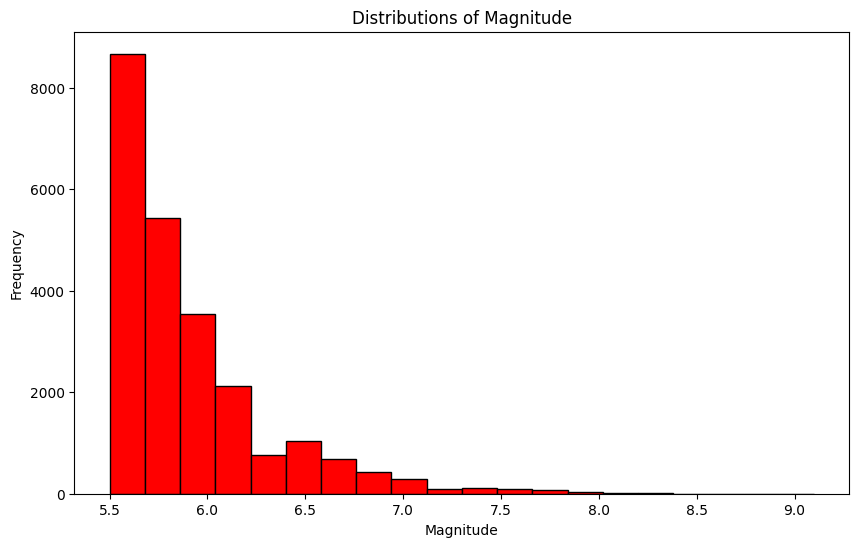

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['Magnitude'],bins=20,color='Red',edgecolor='black')
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Distributions of Magnitude")
plt.show()

The graph shows a Histogram indicating the frequency of the Magnitude
Earthquake of Magnitude 5.5 has struck above 8000 times. There is no Earthquake with Magnitude 8.5 or above

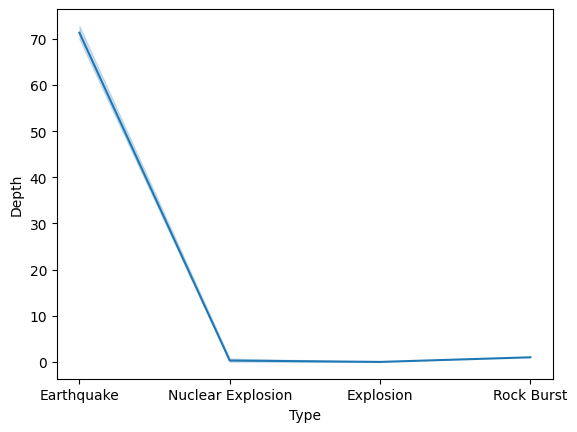

In [ ]:
sns.lineplot(data=df, x="Type", y="Depth")
plt.show()

THe above grpah shows us the depth caused by each type Earthquake causing the hightest damage as the Depth is maximum and Nuclear explosion,Explosion and Rock Burst have similar Depth when occured

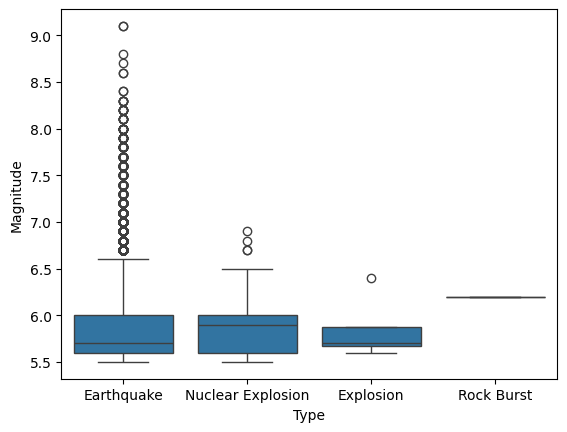

In [ ]:
sns.boxplot(x="Type", y="Magnitude", data=df)
plt.show()

<ipython-input-69-54a2212babb6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Status", y="Root Mean Square", data=df, palette=["red", "blue"])


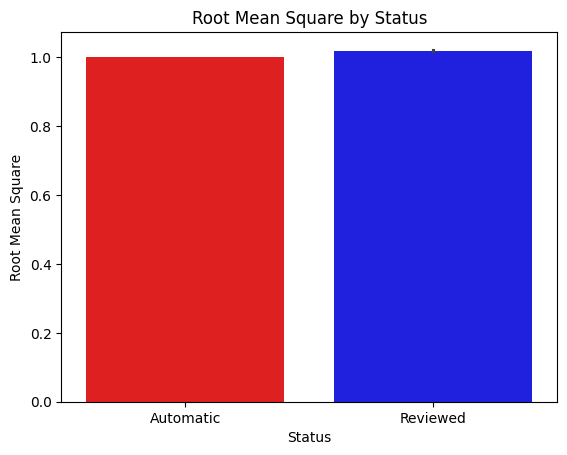

In [ ]:
sns.barplot(x="Status", y="Root Mean Square", data=df, palette=["red", "blue"])
plt.title("Root Mean Square by Status")
plt.xlabel("Status")
plt.ylabel("Root Mean Square")
plt.show()

The graph shows the Root Mean Square of Automatic deteced and Reviewed Earthquakes

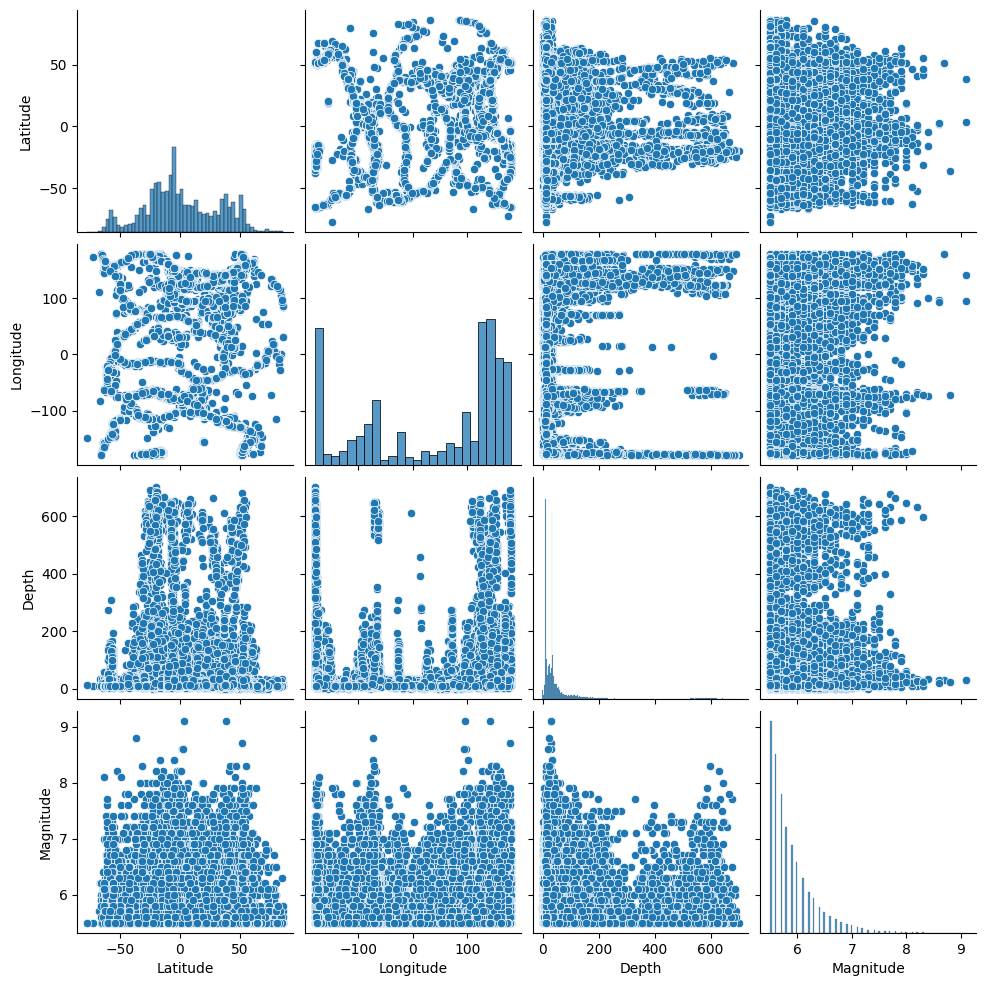

In [ ]:
numerical_df = df[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
sns.pairplot(numerical_df)
plt.show()

We create pair plots to understand the relation between the lables

In [ ]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        timestamp.append('ValueError')

This code efficiently processes date and time data. It iterates through separate date and time lists, converting them into timestamps suitable for computers. If the conversion is successful, timestamps are stored. In case of errors (likely due to invalid formats), it indicates the issue by adding "ValueError" to the list.

In [ ]:
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values

The code seamlessly integrates the processed timestamps into a pandas DataFrame. It creates a pandas Series object specifically designed for one-dimensional labeled data, like timestamps in this case. The Series is then used to add a new column named "Timestamp" to  DataFrame. This column stores the timestamps, making them readily available for further analysis or manipulation alongside other data within the DataFrame.

In [ ]:
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-157630542.0
1,1.863,127.352,80.0,5.8,-157465811.0
2,-20.579,-173.972,20.0,6.2,-157355642.0
3,-59.076,-23.557,15.0,5.8,-157093817.0
4,11.938,126.427,15.0,5.8,-157026430.0


The code  manipulates a dataset using the pandas library in Python, focusing on filtering and cleaning operations. Initially, a new DataFrame named final_data is created by dropping two columns, 'Date' and 'Time', from the original dataset represented by the DataFrame variable data. The drop() function in pandas is utilized here with the axis=1 parameter to indicate column-wise operations. Following this, another refinement is applied to final_data where rows containing the value 'ValueError' in the 'Timestamp' column are removed. This is achieved by filtering the DataFrame based on a condition using boolean indexing, resulting in a DataFrame without the problematic rows. Finally, the head() function is invoked on final_data to display the first few rows, offering a preview of the refined dataset. These operations collectively aim to prepare the data for analysis by eliminating irrelevant columns and excluding erroneous entries, ensuring the dataset's integrity and suitability for further processing.

In [ ]:
pip install basemap

In [ ]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',
            llcrnrlat=-80,
            urcrnrlat=80,
            llcrnrlon=-180,
            urcrnrlon=180,
            lat_ts=20,
            resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()

x, y = m(longitudes, latitudes)


The code initializes a Basemap instance 'm' with specific projection parameters to create a map projection. It then extracts longitude and latitude values from a dataset and converts them to lists. Finally, it converts the longitude and latitude coordinates into map projection coordinates 'x' and 'y' using the Basemap instance 'm'.

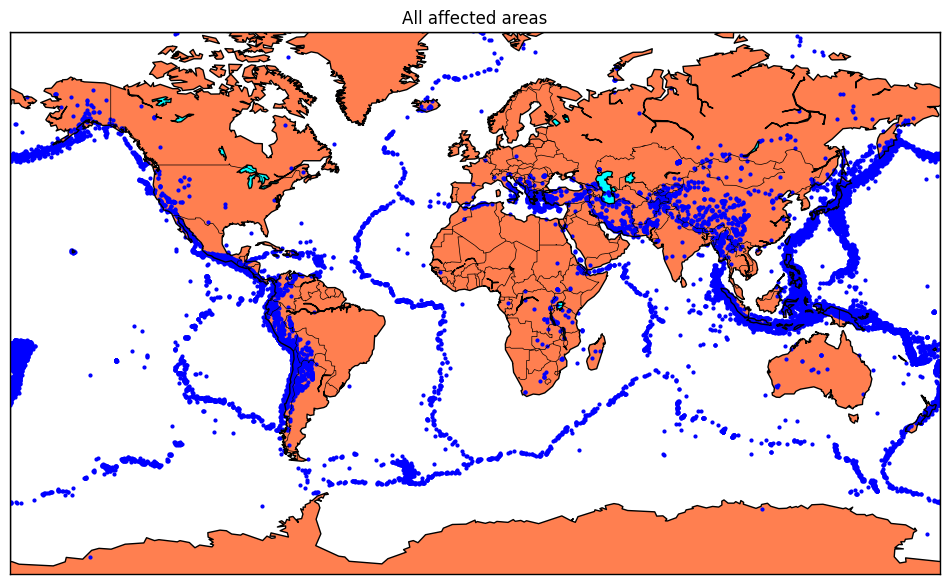

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

The code generates a map visualization depicting affected areas using the Basemap module in Matplotlib. It begins by initializing a new figure with dimensions 12 inches by 10 inches. The title of the plot is set to "All affected areas". Using the Basemap instance 'm', the longitude and latitude coordinates of the affected areas ('x' and 'y') are plotted as blue circles ('o') with a markersize of 2 points. The Basemap instance is then utilized to draw coastlines, fill continents with coral color, and lakes with aqua color. Additionally, country boundaries are drawn, delimiting the affected regions. Finally, the plot is displayed, providing a visual representation of the affected areas on the map, complete with relevant geographic features for context. This visualization aids in understanding the spatial distribution and extent of the impact of the affected areas.

In [ ]:
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(18727, 3) (4682, 3) (18727, 1) (4682, 3)


The code utilizes scikit-learn's train_test_split function to divide a dataset into training and testing sets for features and target variables. With a test size of 20% and a random state set to 42, it generates four arrays representing the training and testing data. Finally, it prints the dimensions of these arrays, aiding in understanding the dataset's partitioning. This process is crucial for assessing machine learning model performance and generalization.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=2)
reg.fit(X_train, y_train)
reg.predict(X_test)

<ipython-input-79-177de9e55830>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


array([5.876, 5.85 , 5.976, ..., 6.306, 6.1  , 5.951])

The code utilizes scikit-learn's RandomForestRegressor, a machine learning algorithm for regression tasks. It initializes the regressor with a fixed random state for reproducibility. Then, it trains the model on the training data (X_train and y_train) using the fit() method. Finally, it generates predictions on the testing data (X_test) using the predict() method. This process enables the evaluation of the model's performance on unseen data, making it a crucial step in the machine learning workflow.

In [ ]:
print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))

predicted_values = reg.predict(X_test)
print("Shape of predicted values:", predicted_values.shape)

print("Shape of y_test:", y_test.shape)


Length of X_test: 4682
Length of y_test: 4682
Shape of predicted values: (4682,)
Shape of y_test: (4682, 1)


In [ ]:
import numpy as np

predicted_values = reg.predict(X_test)

predicted_values_reshaped = predicted_values.reshape(-1, 1)

mse = np.mean((predicted_values_reshaped - y_test) ** 2)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.2001094759483127


This code calculates the Mean Squared Error (MSE) between predicted values generated by a regression model (reg.predict(X_test)) and the true target values (y_test). First, it retrieves the predicted values and the true target values. Since the shapes of the predicted values and the true target values are different (predicted values are one-dimensional and true target values are two-dimensional), the predicted values are reshaped to match the shape of the true target values. This ensures that subtraction can be performed element-wise between the predicted values and the true target values. Then, it computes the squared differences between each corresponding pair of predicted and true values, takes the mean of these squared differences, and prints the resulting MSE. This metric is commonly used to evaluate the performance of regression models, with lower MSE values indicating better model performance.


In [ ]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split

X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = AdaBoostRegressor(random_state=2)
reg.fit(X_train, y_train)
reg.predict(X_test)

print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))

predicted_values = reg.predict(X_test)
print("Shape of predicted values:", predicted_values.shape)

print("Shape of y_test:", y_test.shape)


predicted_values = reg.predict(X_test)

predicted_values_reshaped = predicted_values.reshape(-1, 1)

mse = np.mean((predicted_values_reshaped - y_test) ** 2)

print("Mean Squared Error:", mse)


Length of X_test: 4682
Length of y_test: 4682
Shape of predicted values: (4682,)
Shape of y_test: (4682, 1)
Mean Squared Error: 0.32326084341980443
